{
  "problem": "ChatGPT Problem Converted to JSON for GitHub",
  "age_classes": [
    {
      "age": 0,
      "name": "Fry",
      "range": "0–1 years"
    },
    {
      "age": 1,
      "name": "Juvenile",
      "range": "1–2 years"
    },
    {
      "age": 2,
      "name": "Subadult",
      "range": "2–3 years"
    },
    {
      "age": 3,
      "name": "Young Adult",
      "range": "3–4 years"
    },
    {
      "age": 4,
      "name": "Mature Adult",
      "range": "4+ years"
    }
  ],
  "fecundity": {
    "0": 0.0,
    "1": 0.0,
    "2": 0.0,
    "3": 2.0,
    "4": 3.5
  },
  "survival_rates": {
    "0_to_1": 0.3,
    "1_to_2":


In [1]:
#import numpy
import numpy as np

In [3]:
# create an algorithm that calculates the population size of 5 ages of a fish population over 50 years
# the initial first year population sizes are: age 0: 1000, age 1: 800, age 2: 600, age 3: 400, age 4: 200
# on average young adult fish produce 2 offspring per year and adult fish produce 3.5 offspring per year
# the survival rates for fry to juvenile is 0.3, juvenile to subadult is 0.6, subadult to young adult is 0.7, young adult to adult is 0.8, and mature adults remain in their class with a survival rate of 0.9
#Create a definition to calculate and return the population of each age group and the total population for each year with an initial population of 1000 frys, 800 juveniles, 600 subadults, 400 young adults, and 200 adults

def calculate_fish_population(years):
    # Initial populations
    populations = {
        "fry": 1000,
        "juvenile": 800,
        "subadult": 600,
        "young_adult": 400,
        "adult": 200
    }

    # Survival rates
    survival_rates = {
        "fry": 0.3,
        "juvenile": 0.6,
        "subadult": 0.7,
        "young_adult": 0.8,
        "adult": 0.9
    }

    # Offspring production rates
    offspring_production = {
        "young_adult": 2,
        "adult": 3.5
    }

    # Store yearly populations
    yearly_populations = []

    for year in range(years):
        # Calculate new populations
        new_populations = {
            "fry": 0,
            "juvenile": populations["fry"] * survival_rates["fry"],
            "subadult": populations["juvenile"] * survival_rates["juvenile"],
            "young_adult": populations["subadult"] * survival_rates["subadult"],
            "adult": populations["young_adult"] * survival_rates["young_adult"]
        }

        # Calculate offspring
        new_populations["fry"] += (populations["young_adult"] * offspring_production["young_adult"]) + (populations["adult"] * offspring_production["adult"])

        # Update populations
        populations = new_populations

        # Append to yearly populations
        yearly_populations.append(populations)

    return yearly_populations

    #print the population sizes for each year
population_over_time = calculate_fish_population(50)
for year, pop in enumerate(population_over_time):
    total_population = sum(pop.values())
    print(f"Year {year + 1}: Fry: {int(pop['fry'])}, Juvenile: {int(pop['juvenile'])}, Subadult: {int(pop['subadult'])}, Young Adult: {int(pop['young_adult'])}, Adult: {int(pop['adult'])}, Total: {int(total_population)}")


Year 1: Fry: 1500, Juvenile: 300, Subadult: 480, Young Adult: 420, Adult: 320, Total: 3020
Year 2: Fry: 1960, Juvenile: 450, Subadult: 180, Young Adult: 336, Adult: 336, Total: 3262
Year 3: Fry: 1848, Juvenile: 588, Subadult: 270, Young Adult: 125, Adult: 268, Total: 3100
Year 4: Fry: 1192, Juvenile: 554, Subadult: 352, Young Adult: 189, Adult: 100, Total: 2389
Year 5: Fry: 730, Juvenile: 357, Subadult: 332, Young Adult: 246, Adult: 151, Total: 1819
Year 6: Fry: 1023, Juvenile: 219, Subadult: 214, Young Adult: 232, Adult: 197, Total: 1887
Year 7: Fry: 1157, Juvenile: 306, Subadult: 131, Young Adult: 150, Adult: 186, Total: 1932
Year 8: Fry: 952, Juvenile: 347, Subadult: 184, Young Adult: 92, Adult: 120, Total: 1696
Year 9: Fry: 604, Juvenile: 285, Subadult: 208, Young Adult: 128, Adult: 73, Total: 1301
Year 10: Fry: 515, Juvenile: 181, Subadult: 171, Young Adult: 145, Adult: 103, Total: 1117
Year 11: Fry: 652, Juvenile: 154, Subadult: 108, Young Adult: 120, Adult: 116, Total: 1152
Year

In [15]:
# complete the algorithm using matrix multiplication
def calculate_fish_population_matrix(years):
    # Initial population vector
    population_vector = np.array([[1000],  # fry
                                  [800],   # juvenile
                                  [600],   # subadult
                                  [400],   # young adult
                                  [200]])  # adult

    # Transition matrix
    transition_matrix = np.array([[0, 2, 3.5, 0, 0],        # fry produced by young adults and adults
                                  [0.3, 0, 0, 0, 0],       # juvenile from fry
                                  [0, 0.6, 0, 0, 0],       # subadult from juvenile
                                  [0, 0, 0.7, 0, 0],       # young adult from subadult
                                  [0, 0, 0, 0.8, 0.9]])    # adult from young adult and adult

    # Store yearly populations
    yearly_populations = []

    for year in range(years):
        # Calculate new population vector
        population_vector = np.dot(transition_matrix, population_vector)

        # Append to yearly populations
        yearly_populations.append(population_vector.flatten())

    return yearly_populations 

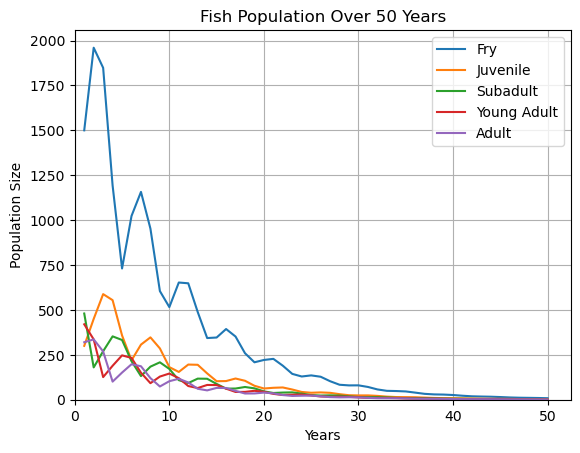

In [17]:
# plot the populations of fry, juvenile, subadult, young adult, and adult fish over the 50 years using matplotlib
import matplotlib.pyplot as plt
years = np.arange(1, 51)
fry_pop = [pop['fry'] for pop in population_over_time]
juvenile_pop = [pop['juvenile'] for pop in population_over_time]
subadult_pop = [pop['subadult'] for pop in population_over_time]
young_adult_pop = [pop['young_adult'] for pop in population_over_time]
adult_pop = [pop['adult'] for pop in population_over_time]
plt.plot(years, fry_pop, label='Fry')
plt.plot(years, juvenile_pop, label='Juvenile')
plt.plot(years, subadult_pop, label='Subadult')
plt.plot(years, young_adult_pop, label='Young Adult')
plt.plot(years, adult_pop, label='Adult')
plt.xlabel('Years')
plt.ylabel('Population Size')
plt.title('Fish Population Over 50 Years')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
plt.show() 

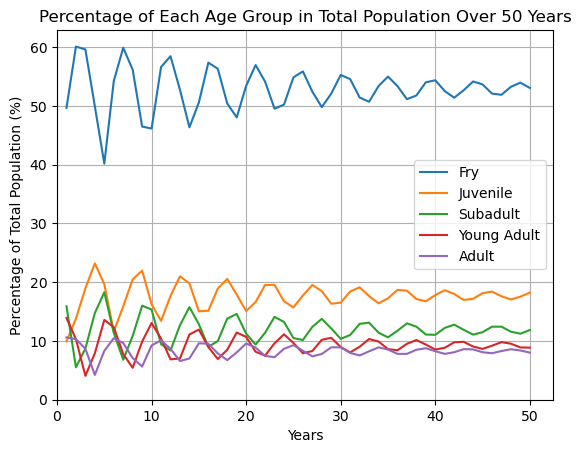

In [18]:
# create another plot showing the percentage of each age group in the total population over the 50 years
total_pop = [sum(pop.values()) for pop in population_over_time] 
fry_percentage = [pop['fry'] / total * 100 for pop, total in zip(population_over_time, total_pop)]
juvenile_percentage = [pop['juvenile'] / total * 100 for pop, total in zip(population_over_time, total_pop)]
subadult_percentage = [pop['subadult'] / total * 100 for pop, total in zip(population_over_time, total_pop)]
young_adult_percentage = [pop['young_adult'] / total * 100 for pop, total in zip(population_over_time, total_pop)]
adult_percentage = [pop['adult'] / total * 100 for pop, total in zip(population_over_time, total_pop)]
plt.plot(years, fry_percentage, label='Fry')
plt.plot(years, juvenile_percentage, label='Juvenile')
plt.plot(years, subadult_percentage, label='Subadult')
plt.plot(years, young_adult_percentage, label='Young Adult')
plt.plot(years, adult_percentage, label='Adult')
plt.xlabel('Years')
plt.ylabel('Percentage of Total Population (%)')
plt.title('Percentage of Each Age Group in Total Population Over 50 Years')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
plt.show()

In [19]:
{
  "questions": [
    {
      "question": "What was the real-world example?",
      "answer": "ChatGPT provided a real-world example of a fish population in a large lake, where there are five different age groups of fish: fry, juvenile, subadult, young adult, and adult. Fecundity rates were provided, with young adults producing 2 offspring on average and adults producing 3.5 offspring on average. The survival rates were also provided, with the rate of surviving from fry to juvenile being 0.3, juvenile to subadult being 0.6, subadult to young adult being 0.7, young adult to adult being 0.8, and mature adults remaining in their class with a survival rate of 0.9. Using these parameters, guidance from CoPilot, and our work from Assignment 6, I created an age-structured population model to simulate the fish population over 50 years."
    },
    {
      "question": "What was the result of the 50 year model using your initial populations?",
      "answer": "Over the 50-year simulation, the fish population decreased significantly across all age groups. The initial population of 1000 fry declined to nearly zero by year 50, with similar declines observed in the juvenile, subadult, young adult, and adult age groups."
    },
    {
      "question": "Describe what the transient and stable behavior of the model looked like.",
      "answer": "The model exhibited transient behavior in the initial years, where the populations of all age groups peaked before fluctuating between declines and sharp increases. However, as the years progressed, the population grew stable as all age groups steadily declined."
    }
  ]
}


{'questions': [{'question': 'What was the real-world example?',
   'answer': 'ChatGPT provided a real-world example of a fish population in a large lake, where there are five different age groups of fish: fry, juvenile, subadult, young adult, and adult. Fecundity rates were provided, with young adults producing 2 offspring on average and adults producing 3.5 offspring on average. The survival rates were also provided, with the rate of surviving from fry to juvenile being 0.3, juvenile to subadult being 0.6, subadult to young adult being 0.7, young adult to adult being 0.8, and mature adults remaining in their class with a survival rate of 0.9. Using these parameters, guidance from CoPilot, and our work from Assignment 6, I created an age-structured population model to simulate the fish population over 50 years.'},
  {'question': 'What was the result of the 50 year model using your initial populations?',
   'answer': 'Over the 50-year simulation, the fish population decreased significan